In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import time
import datetime

history_size = 10

2022-11-01 15:55:21.771053: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-01 15:55:21.935968: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-01 15:55:21.936011: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-01 15:55:21.968042: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-01 15:55:22.791079: W tensorflow/stream_executor/platform/de

In [2]:
dataframe = pd.read_csv("Data/2016_2022.csv", parse_dates = True)

In [3]:
print(dataframe)
value_serie = dataframe.loc[dataframe["Source"] == 3, "Valeur"]
print(value_serie)
date = dataframe["Date"]
n = len(value_serie.values)
train_values = value_serie.values[:n//2].reshape(-1,1)
test_values = value_serie.values[n//2:].reshape(-1,1)

                        Date  Valeur  Source
0        01/01/2016 00:00:00  3.6060       4
1        01/01/2016 00:00:00  3.6070       3
2        01/01/2016 00:00:00  3.6070       2
3        01/01/2016 00:00:15  3.6070       1
4        01/01/2016 00:01:15  3.5940       1
...                      ...     ...     ...
4089172  04/08/2022 11:21:00  3.8183       1
4089173  04/08/2022 11:22:00  3.8045       1
4089174  04/08/2022 11:23:00  3.7914       1
4089175  04/08/2022 11:24:00  3.7783       1
4089176  04/08/2022 11:25:00  3.7657       1

[4089177 rows x 3 columns]
1          3.607
13         3.496
25         3.446
37         3.298
49         3.229
           ...  
4034625    1.931
4034637    1.915
4034649    1.918
4034661    1.942
4034673    1.998
Name: Valeur, Length: 338253, dtype: float64


In [4]:
print(f"Valeurs d'entrainement : {train_values}")
print(f"Valeurs de test : {test_values}")

Valeurs d'entrainement : [[3.607]
 [3.496]
 [3.446]
 ...
 [5.783]
 [5.696]
 [5.593]]
Valeurs de test : [[5.476]
 [5.355]
 [5.21 ]
 ...
 [1.918]
 [1.942]
 [1.998]]


In [15]:
def create_window(dataset, start_index, end_index, history_size):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset)

    for i in range(start_index, end_index-history_size):
        indices = range(i, i+history_size)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels += [dataset[i:i+history_size]]

    return np.array(data), np.array(labels)

In [16]:
train_features, train_labels = create_window(train_values, 0, None, history_size)
test_features, test_labels = create_window(test_values, 0, None,history_size)

#print(train_features)
#print(train_labels)

In [17]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_features, train_labels)).batch(100).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_features, test_labels)).batch(100).repeat()

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
history = model.fit(
    train_dataset,
    epochs=100,
    steps_per_epoch=20,
    validation_data=test_dataset,
    validation_steps=3
)

Epoch 1/100
20/20 [==============================] - 2s 22ms/step - loss: 20.1451 - val_loss: 12.2656
Epoch 2/100
20/20 [==============================] - 0s 9ms/step - loss: 13.9195 - val_loss: 8.2014
Epoch 3/100
20/20 [==============================] - 0s 7ms/step - loss: 9.3044 - val_loss: 4.4849
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 5.9223 - val_loss: 2.2737
Epoch 5/100
20/20 [==============================] - 0s 8ms/step - loss: 3.4935 - val_loss: 1.4467
Epoch 6/100
20/20 [==============================] - 0s 16ms/step - loss: 2.7505 - val_loss: 0.8986
Epoch 7/100
20/20 [==============================] - 0s 8ms/step - loss: 1.7491 - val_loss: 0.4498
Epoch 8/100
20/20 [==============================] - 0s 8ms/step - loss: 1.5164 - val_loss: 0.2328
Epoch 9/100
20/20 [==============================] - 0s 8ms/step - loss: 0.6627 - val_loss: 0.1384
Epoch 10/100
20/20 [==============================] - 0s 8ms/step - loss: 0.8394 - val_loss: 0.0938
Epoc

Epoch 83/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0434 - val_loss: 0.1309
Epoch 84/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0355 - val_loss: 0.0214
Epoch 85/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0585 - val_loss: 0.0242
Epoch 86/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0468 - val_loss: 0.0249
Epoch 87/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0332 - val_loss: 0.0677
Epoch 88/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0537 - val_loss: 0.0373
Epoch 89/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0705 - val_loss: 0.0687
Epoch 90/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0969 - val_loss: 0.1370
Epoch 91/100
20/20 [==============================] - 0s 8ms/step - loss: 0.1026 - val_loss: 0.0939
Epoch 92/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0648 - val_loss: 0.0315


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def plot_history(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 100, 0, max(max(loss), max(val_loss))])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

In [28]:
#print(history)
#plot_history(history)

In [29]:
predictions = model.predict(train_features)

print(predictions)

5285/5285 [==============================] - 9s 2ms/step
[[3.033278  2.9635668 2.9173036 ... 2.6898346 2.662074  2.632785 ]
 [2.9937806 2.9505217 2.9158912 ... 2.7678053 2.7544322 2.7354035]
 [2.9593134 2.9408586 2.9141564 ... 2.8445778 2.8445103 2.8355618]
 ...
 [6.287863  6.298917  6.240727  ... 5.949636  5.809847  5.676681 ]
 [6.3179483 6.3139668 6.2360888 ... 5.882014  5.7372494 5.5963907]
 [6.3367624 6.3170176 6.2220545 ... 5.8009458 5.6525984 5.505169 ]]


169106
169126


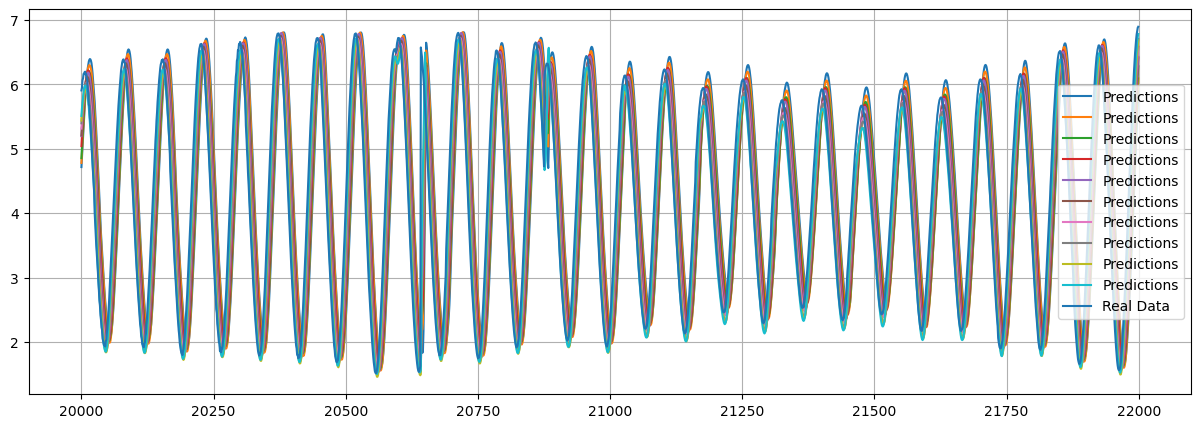

In [23]:
print(len(predictions))
print(len(train_values))
begin = 20_000
end = 22_000 
time = [i for i in range(end)]    


fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1, 1, 1)
ax.grid(True)

plt.plot(time[begin:end], predictions[begin:end], label = "Predictions")
plt.plot(time[begin:end], value_serie.values[begin+history_size*2:end+history_size*2], label = "Real Data")
plt.legend()
plt.show()

In [40]:
test = [[[i] for i in range(50)]]
predi = model.predict(test)

1/1 [==============================] - 1s 558ms/step


In [41]:
print(predi)

[[6.319202]]


In [30]:
model.save("models/test.h5")